In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc, mean_squared_error

In [356]:
train_df = pd.read_csv("train.csv")
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [357]:
test_df = pd.read_csv("test.csv")
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [358]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### initial analysis
- drop ID column
- we'll drop the poutcome column as is has more than 90% null values
- we'll fill the null values in ('job', 'education', 'contact') with the mode
- we'll have to encode each of ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y')

In [359]:
train_df.default.value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_11376\4102963690.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_df, x = 'default', palette= 'viridis', order=train_df.default.value_counts().index)


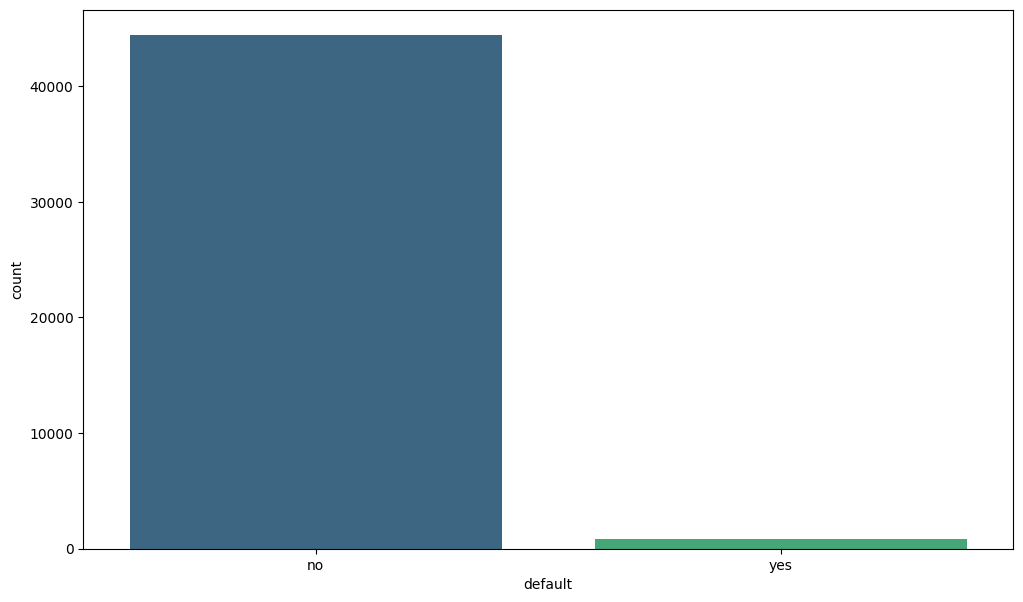

In [360]:
plt.figure(figsize=(12,7))
sns.countplot(data = train_df, x = 'default', palette= 'viridis', order=train_df.default.value_counts().index)
plt.show()

this feature is useless so we'll remove it

In [361]:
train_df.drop(columns=['default'], inplace = True)

In [362]:
test_df.drop(columns=['default'], inplace = True)

In [363]:
train_df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_11376\2799952157.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(train_df.balance, palette='viridis')


<Axes: xlabel='balance', ylabel='Density'>

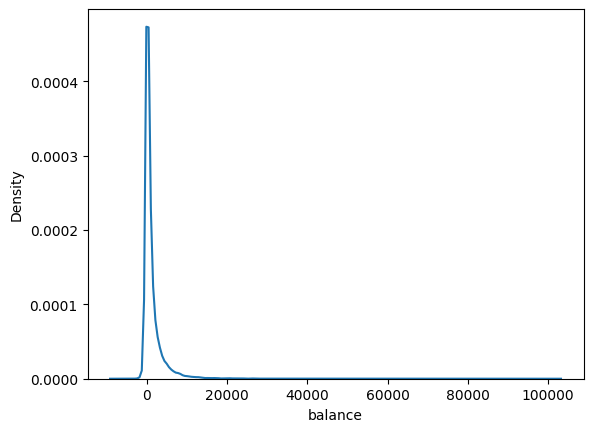

In [364]:
sns.kdeplot(train_df.balance, palette='viridis')

In [365]:
train_df[train_df.balance<=0].balance.count()

7280

In [366]:
percentile_threshold = 95

percentile_value = int(np.percentile(train_df.balance, percentile_threshold))

outliers = train_df[train_df.balance>percentile_value]

print(f'{percentile_threshold}th percentile value: {percentile_value}')
print(f'Number of Potential Outliers: {outliers.value_counts().sum()}')

95th percentile value: 5768
Number of Potential Outliers: 2260


In [367]:
train_df.drop(train_df[train_df['balance'] > 5768].index, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11376\2799952157.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(train_df.balance, palette='viridis')


<Axes: xlabel='balance', ylabel='Density'>

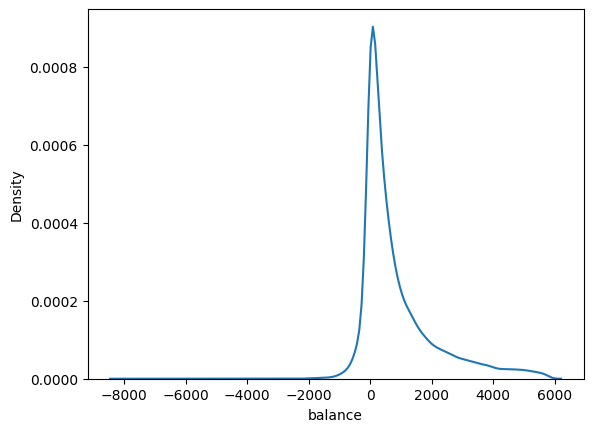

In [368]:
sns.kdeplot(train_df.balance, palette='viridis')

C:\Users\user\AppData\Local\Temp\ipykernel_11376\2411299523.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, y = 'balance', palette='viridis')


<Axes: ylabel='balance'>

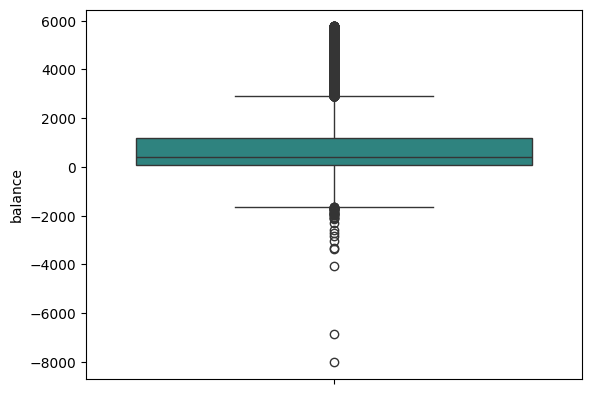

In [369]:
sns.boxplot(data=train_df, y = 'balance', palette='viridis')

In [370]:
percentile_threshold = 5

percentile_value = int(np.percentile(train_df.balance, percentile_threshold))

outliers = train_df[train_df.balance<percentile_value]

print(f'{percentile_threshold}th percentile value: {percentile_value}')
print(f'Number of Potential Outliers: {outliers.value_counts().sum()}')

5th percentile value: -191
Number of Potential Outliers: 2142


In [371]:
train_df.drop(train_df[train_df['balance'] <= -190].index, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11376\3772708786.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(train_df['balance'], palette='viridis')


<Axes: xlabel='balance', ylabel='Density'>

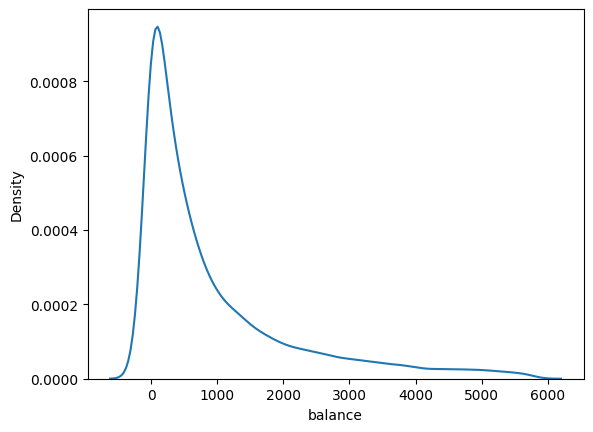

In [372]:
sns.kdeplot(train_df['balance'], palette='viridis')

C:\Users\user\AppData\Local\Temp\ipykernel_11376\2411299523.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, y = 'balance', palette='viridis')


<Axes: ylabel='balance'>

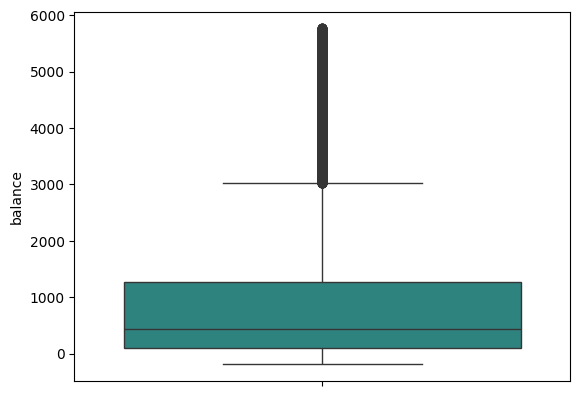

In [373]:
sns.boxplot(data=train_df, y = 'balance', palette='viridis')

In [374]:
train_df.previous.value_counts()

previous
0      33299
1       2522
2       1896
3       1035
4        651
5        418
6        255
7        187
8        126
9         79
10        62
11        61
12        41
13        31
14        18
15        18
17        13
16        12
19        10
20         7
23         7
22         6
24         5
27         5
18         4
21         4
29         3
25         3
38         2
37         2
30         2
51         1
275        1
26         1
58         1
28         1
32         1
40         1
55         1
41         1
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_11376\3862619137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x = 'previous', palette='viridis', order=train_df.previous.value_counts().index)


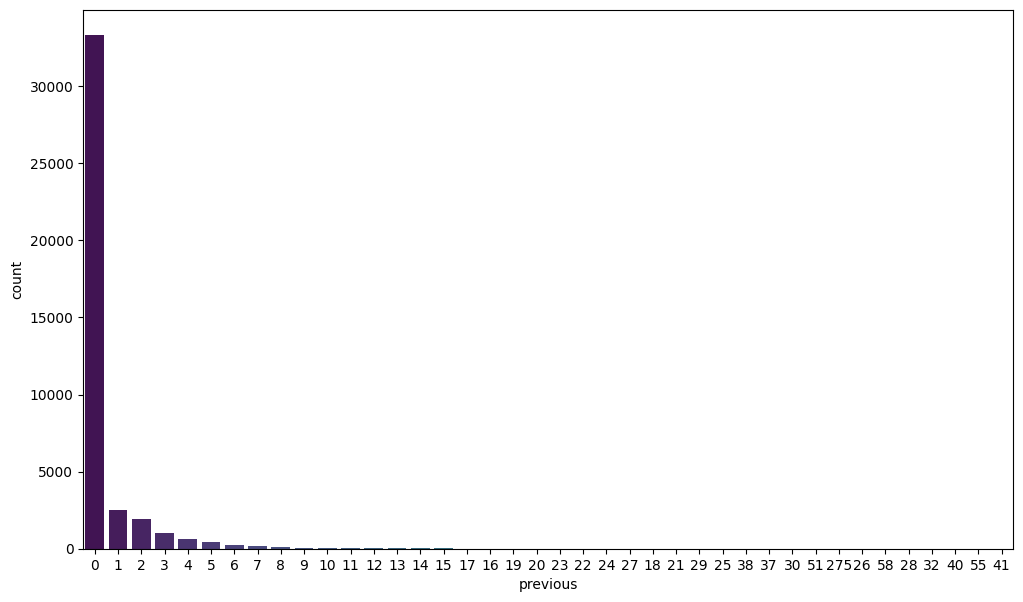

In [375]:
plt.figure(figsize=(12,7))
sns.countplot(data=train_df, x = 'previous', palette='viridis', order=train_df.previous.value_counts().index)
plt.show()

most of the values are zeros so we'll drop this column

In [376]:
train_df.drop('previous',axis = 1, inplace=True)

In [377]:
test_df.drop('previous',axis = 1, inplace=True)

In [378]:
train_df.poutcome.value_counts()

poutcome
unknown    33304
failure     4405
other       1678
success     1406
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_11376\1109129848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x = 'poutcome', palette='viridis', order=train_df.poutcome.value_counts().index)


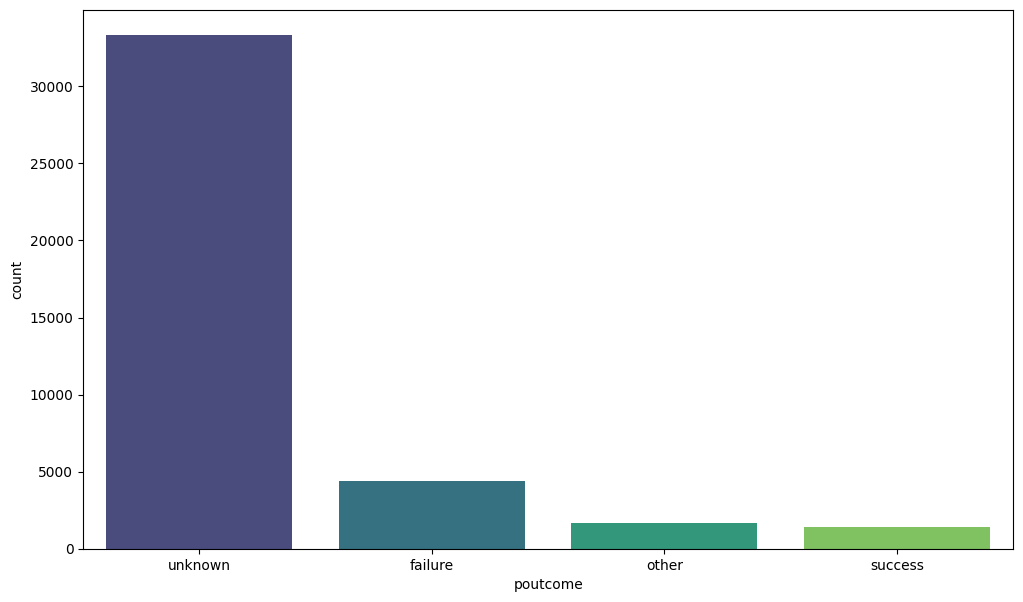

In [379]:
plt.figure(figsize=(12,7))
sns.countplot(data=train_df, x = 'poutcome', palette='viridis', order=train_df.poutcome.value_counts().index)
plt.show()

most of the values are unknown so it's useless we'll drop it

In [380]:
train_df.drop(columns=['poutcome'], inplace = True)

In [381]:
test_df.drop(columns=['poutcome'], inplace = True)

In [382]:
imputer_mode = SimpleImputer(strategy='most_frequent')

In [383]:
train_df['housing'] = imputer_mode.fit_transform(train_df[['housing']])[:,0]

In [384]:
imputer_median = SimpleImputer(strategy="median")

In [385]:
train_df['campaign'] = imputer_median.fit_transform(train_df[['campaign']])[:,0]

In [386]:
train_df = train_df.apply(LabelEncoder().fit_transform)

In [387]:
test_df = test_df.apply(LabelEncoder().fit_transform)

In [388]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40793 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40793 non-null  int64
 1   job        40793 non-null  int32
 2   marital    40793 non-null  int32
 3   education  40793 non-null  int32
 4   balance    40793 non-null  int64
 5   housing    40793 non-null  int32
 6   loan       40793 non-null  int32
 7   contact    40793 non-null  int32
 8   day        40793 non-null  int64
 9   month      40793 non-null  int32
 10  duration   40793 non-null  int64
 11  campaign   40793 non-null  int64
 12  pdays      40793 non-null  int64
 13  y          40793 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 3.4 MB


In [389]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int32
 2   marital    4521 non-null   int32
 3   education  4521 non-null   int32
 4   balance    4521 non-null   int64
 5   housing    4521 non-null   int32
 6   loan       4521 non-null   int32
 7   contact    4521 non-null   int32
 8   day        4521 non-null   int64
 9   month      4521 non-null   int32
 10  duration   4521 non-null   int64
 11  campaign   4521 non-null   int64
 12  pdays      4521 non-null   int64
 13  y          4521 non-null   int32
dtypes: int32(8), int64(6)
memory usage: 353.3 KB


In [390]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

In [391]:
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [392]:
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
lr.fit(X_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [393]:
print(lr.score(X_train, y_train))

0.8897850121344348


In [394]:
print(lr.score(X_test, y_test))

0.8852023888520238


In [395]:
y_pred = lr.predict(X_test)

In [396]:
y_probs = lr.predict_proba(X_test)[:, 1]

In [397]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

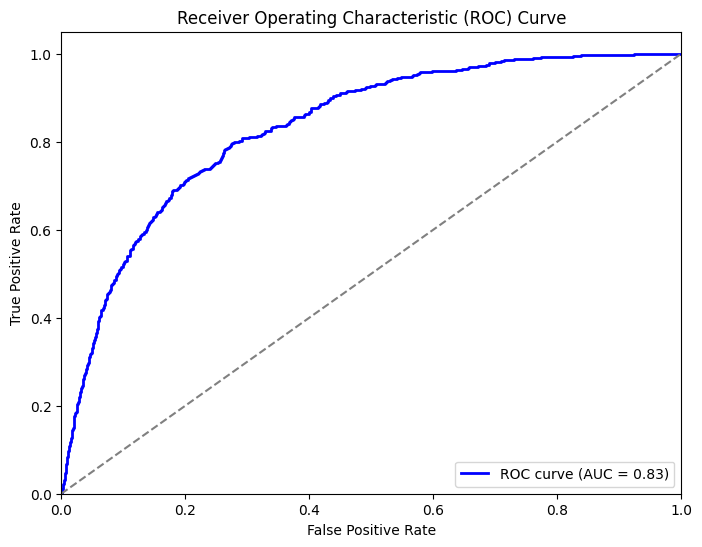

In [398]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: >

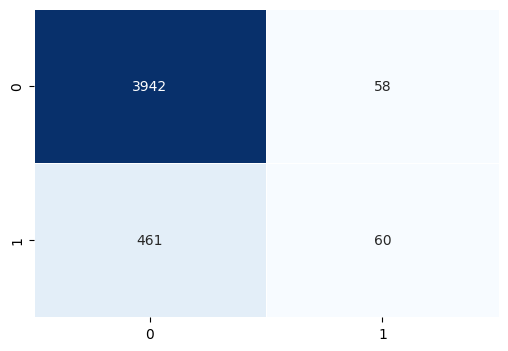

In [399]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

In [400]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4000
           1       0.51      0.12      0.19       521

    accuracy                           0.89      4521
   macro avg       0.70      0.55      0.56      4521
weighted avg       0.85      0.89      0.85      4521



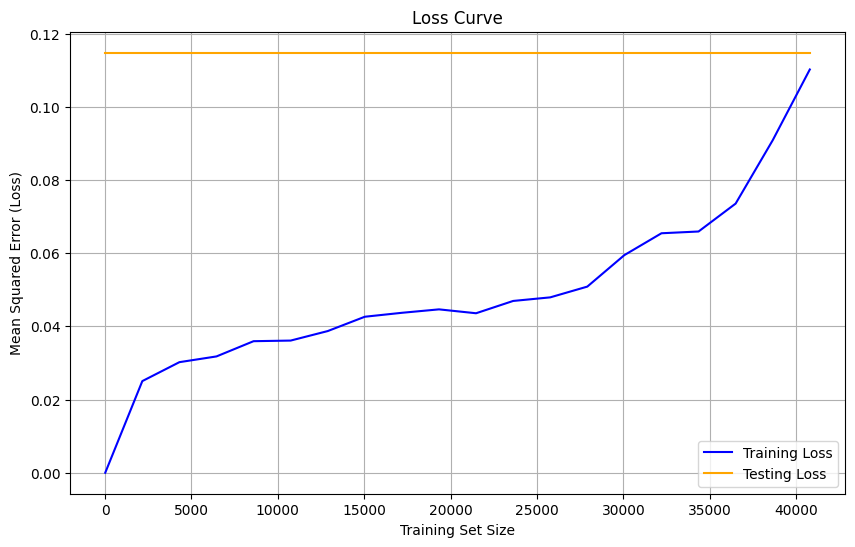

In [401]:
train_losses = []
test_losses = []
steps = np.linspace(10, len(X_train), 20, dtype=int)
for step in steps:
    train_pred = lr.predict(X_train[:step])
    test_pred = lr.predict(X_test)
    train_loss = mean_squared_error(y_train[:step], train_pred)
    test_loss = mean_squared_error(y_test, test_pred)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

plt.figure(figsize=(10, 6))
plt.plot(steps, train_losses, label='Training Loss', color='blue')
plt.plot(steps, test_losses, label='Testing Loss', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

In [403]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [404]:
print(knn.score(X_train, y_train))

0.9103032383006888


In [405]:
print(knn.score(X_test, y_test))

0.8752488387524884


In [406]:
y_pred = knn.predict(X_test)

<Axes: >

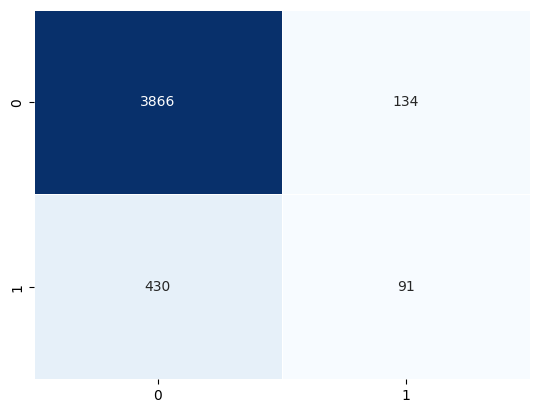

In [407]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

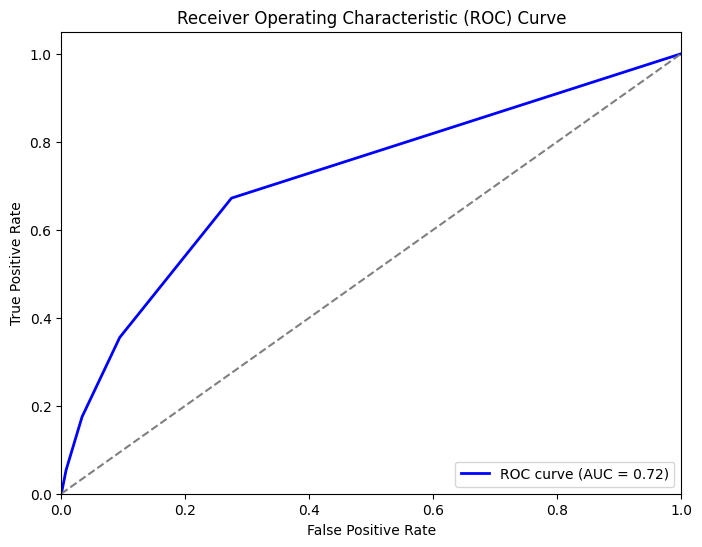

In [408]:
y_probs = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [409]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4000
           1       0.40      0.17      0.24       521

    accuracy                           0.88      4521
   macro avg       0.65      0.57      0.59      4521
weighted avg       0.84      0.88      0.85      4521



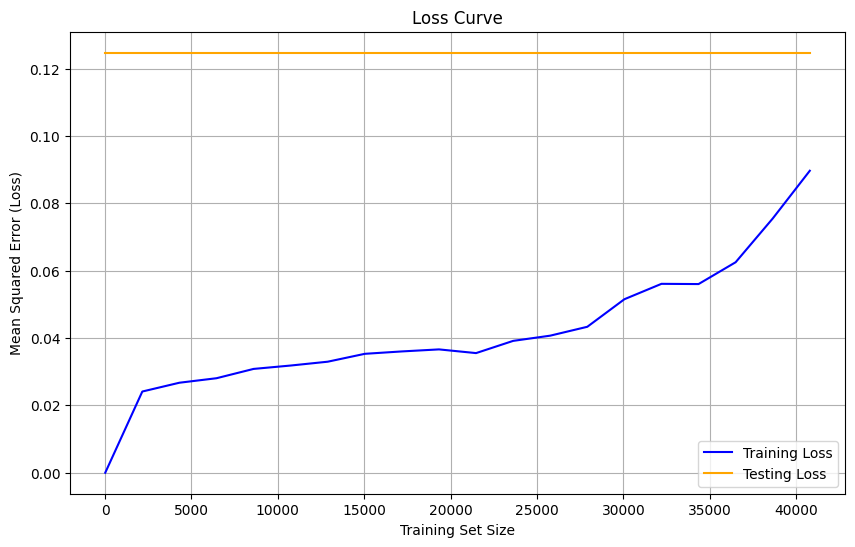

In [410]:
train_losses = []
test_losses = []
steps = np.linspace(10, len(X_train), 20, dtype=int)
for step in steps:
    train_pred = knn.predict(X_train[:step])
    test_pred = knn.predict(X_test)
    train_loss = mean_squared_error(y_train[:step], train_pred)
    test_loss = mean_squared_error(y_test, test_pred)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

plt.figure(figsize=(10, 6))
plt.plot(steps, train_losses, label='Training Loss', color='blue')
plt.plot(steps, test_losses, label='Testing Loss', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

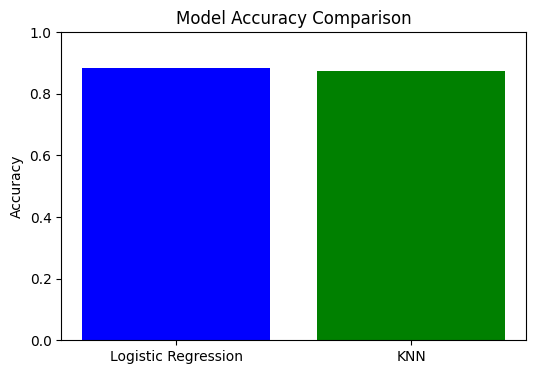

In [411]:
lr_accuracy = accuracy_score(y_test, lr.predict(X_test))
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))
# Plot Accuracy Comparison
plt.figure(figsize=(6, 4))
models = ['Logistic Regression', 'KNN']
accuracies = [lr_accuracy, knn_accuracy]
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
